<a href="https://colab.research.google.com/github/vladgap/LLC/blob/main/LLC%20simulation%20equilibrium%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
pip install MLNN

  Preparing metadata (setup.py) ... done
  Created wheel for MLNN: filename=MLNN-2.1-py3-none-any.whl size=7866 sha256=da508584ef3a299decde764dd93a112ddb7e4a7a39e8a4b110b67a524aaab4b7
  Stored in directory: /root/.cache/pip/wheels/9e/e0/20/d5af76160e4e218d06f2277dc88a9dab41cb0b6e1d4221a58b
Successfully built MLNN


In [3]:
from MLNN import*

In [4]:
def CopyPasteToArray(a):
  if a.startswith('\n'):
    b=a[1:]
  else:
    b=a
  if b.endswith('\n'):
    b=b[:-1]
  c=b.replace('\t',',')
  d=c.split('\n')
  f=[]
  for e in d:
    if e.replace(',','').replace('.','').isdigit(): # only digits no letters
      f.append(list(eval(e)))
    else:
      f.append(e.split(','))
  return f

# EQUIL_rotem_lit1
lit data with NN model (7 hidden sigmoids)

In [5]:
data1=pd.DataFrame(data=[
[63.5,	1.3,	42.4,	15.0],
[58.7,	1.2,	36.9,	13.8],
[52.0, 1.0,	27.7,	11.8],
[45.5,	1.0,	18.9,	9.6],
[39.1,	1.4,	10.2,	8.3],
[31.5,	1.5,	5.1,	8.8],
[22.9,	2.0,	2.3,	9.0],
[12.6,	2.2,	0.90,	9.3],
[6.3,	2.4,	0.45,	9.45],
[0.01,	2.6,	0.01,	9.6],
],
columns=['H3PO4_aq', 'solvent_aq', 'H3PO4_org', 'water_org'])

In [6]:
data1.head()

H3PO4_aq  solvent_aq  H3PO4_org  water_org
0      63.5         1.3       42.4       15.0
1      58.7         1.2       36.9       13.8
2      52.0         1.0       27.7       11.8
3      45.5         1.0       18.9        9.6
4      39.1         1.4       10.2        8.3

In [7]:
fig1=go.Figure()
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=data1[data1.columns[i]], name=data1.columns[i])) for i in range(1,4)]
fig1.update_layout(title='', width=1200, height=600,)
fig1.show()

In [8]:
X1=np.array(data1)[:,[0]]
T1=np.array(data1)[:,[1,2,3]]

## Model

### scaling

In [9]:
scaler_X1 = preprocessing.StandardScaler().fit(X1)
scaler_T1 = preprocessing.StandardScaler().fit(T1)

# scaler_X1.mean_, scaler_X1.scale_ = np.zeros(X1.shape[1]), np.ones(X1.shape[1]) # disable scaling
# scaler_T1.mean_, scaler_T1.scale_ = np.zeros(X1.shape[1]), np.ones(X1.shape[1]) # disable scaling

scaler_data1 = [scaler_X1.mean_, scaler_X1.scale_, scaler_T1.mean_, scaler_T1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data1[0], scaler_data1[1])
print('scaler T -- mean, stdev:  ',scaler_data1[2], scaler_data1[3])

X_sc1 = scaler_X1.transform(X1)
T_sc1 = scaler_T1.transform(T1)
X_sc1[0:3]

scaler X -- mean, stdev:   [33.211] [21.13387066]
scaler T -- mean, stdev:   [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


array([[1.433197  ],
       [1.20607344],
       [0.8890468 ]])

In [10]:
def print_scaler_data(scaler_data):
    print('scaler X -- mean, stdev:  ',scaler_data[0], scaler_data[1])
    print('scaler T -- mean, stdev:  ',scaler_data[2], scaler_data[3])

### parameter searching

In [11]:
bp_iter=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')
learning_rate = [0.05, 0.1, 0.5]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc1, T_sc1, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:362: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:445: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:445: RuntimeWarning:

invalid value encountered in multiply

<ipython-input-11-162517e96d7f>:16: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

overflow encountered in reduce



61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [12]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
53           0.10           0.95                  0.0    0.002994   
23           0.05           0.95                  0.0    0.009429   
54           0.10           0.95                  0.0    0.010384   
52           0.10           0.95                  0.0    0.011135   
50           0.10           0.95                  0.0    0.011484   
..            ...            ...                  ...         ...   
65           0.50           0.80                  0.5    3.000000   
89           0.50           0.95                  0.5    3.000000   
78           0.50           0.90                  0.5    3.000137   
77           0.50           0.90                  0.5    3.000254   
67           0.50           0.80                  0.5    3.000361   

    relative_delta  
53   -2.493047e-01  
23   -5.779347e-02  
54   -1.939935e-02  
52   -8.050215e-02  
50   -2.423632e-02  
..             ...  
65    0.000000e+00  
89    1.480297e-14  
78   -9.620357e-08  
77   -3.305349e-07  
67   -3.704424e-07  

[90 rows x 5 columns]

In [13]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

### running best parameters

In [14]:
bp_iter=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc1, T_sc1, epochs=1500, learning_rate = 0.1, momentum_term = 0.95, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [15]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

### best_weights_for_now

In [16]:
best_weights_for_now2=weights_lists2[0] # 7 hidden
best_weights_for_now2

[[[-0.6825815793002185,
   5.309782629525364,
   3.5066353257667733,
   -1.3938092571232878,
   -5.0053547415135675,
   -0.321204348055911,
   -3.963619838541863]],
 [[3.4784450968455083,
   -6.151842102715746,
   -10.520931234299844,
   -1.3651784717055868,
   2.9880909695049476,
   -5.153861980963197,
   1.8602772334387654]],
 [[0.600179071238023, -0.6331476984358108, 0.07742986703478669],
  [1.3316131984314001, 1.100012113855315, 1.806974388295491],
  [5.11932171089488, 2.192037963001764, 5.546757358445543],
  [3.202484150484368, -0.34810784399082684, 0.4994035102212497],
  [-0.907806287902737, -0.3458197703450605, -4.658204833593978],
  [3.0996005016269264, -1.032464426718459, -0.49141114598821967],
  [2.127836307147209, -1.2879465092373332, 3.3301694894553253]],
 [[-2.415364319043596, 1.5543373624857038, 0.49425624256170225]]]

In [17]:
manual_best_weights_for_now2=[[[-4.215621245080982,
   -8.235086763118087,
   -1.6251342150606451,
   -6.9206357615871035,
   -3.4092427169369826,
   -7.4263402914028775,
   -3.7003458539301977]],
 [[0.8764395040443358,
   3.9145850159876945,
   -1.5013585830931442,
   -1.194371163565281,
   4.118411550251139,
   5.892242255497829,
   -6.755593628941706]],
 [[-2.6609909047049918, -0.44480776958732143, 1.9256391063013463],
  [2.566022222516618, -0.5042582093932455, -1.432212975592254],
  [1.405004033981333, -0.2988952466228391, 0.5807591718257896],
  [2.0692859230668117, -0.0780871568942863, -0.5145373287488922],
  [-0.7989625307881565, -1.957459884661486, -2.8991426864622065],
  [-0.5821795598385298, -0.22284877970127598, -0.9077232625087237],
  [1.619488070885094, 0.03697105802710269, 0.008613201857731975]],
 [[-0.4010006364699687, 2.4687577407660806, 2.995012357373033]]]

 # 7 relu
 # epochs=1000, learning_rate = 0.1, momentum_term = 0.95, learning_rate_decay = 0
 # loss = .00038

### fitting best parameters

In [18]:
bp1=VectorBackProp(layers=[1,7,3], hidden_activation = 'sigmoid')

In [19]:
# bp1.import_weights(best_weights_for_now2)
bp1.import_weights(manual_best_weights_for_now2)
bp1.fit(X_sc1, T_sc1, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [20]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(y=bp1.loss_list[20:], name=''))
print('Initial loss =', bp1.loss_list[0])
print('Final loss =', bp1.loss_list[-1])
# fig1.show()

Initial loss = 0.00038317489657026835
Final loss = 0.00038081061323728493


### prediction

In [21]:
predics1=scaler_T1.inverse_transform(bp1.run(X_sc1))
predics1

array([[1.29918281e+00, 4.24818141e+01, 1.49962517e+01],
       [1.20153909e+00, 3.67329683e+01, 1.38077713e+01],
       [9.98853822e-01, 2.78389142e+01, 1.17944258e+01],
       [1.00094900e+00, 1.88213747e+01, 9.60332916e+00],
       [1.39837341e+00, 1.02414093e+01, 8.29734125e+00],
       [1.50272999e+00, 5.07996128e+00, 8.80178587e+00],
       [1.99276586e+00, 2.28913730e+00, 8.99802472e+00],
       [2.22136370e+00, 9.49095682e-01, 9.29600691e+00],
       [2.37724870e+00, 4.07546881e-01, 9.45913277e+00],
       [2.60699794e+00, 1.89286597e-02, 9.59614282e+00]])

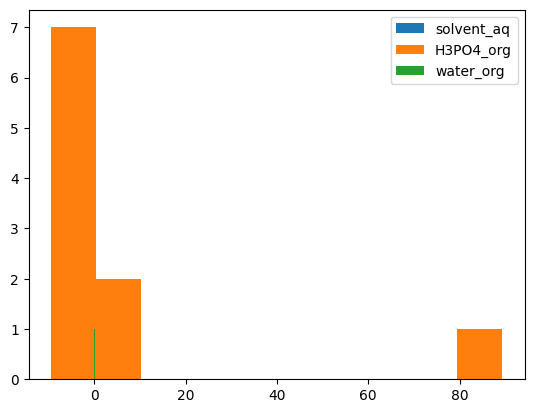

In [22]:
pred=predics1
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T1[:,0])/T1[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T1[:,1])/T1[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T1[:,2])/T1[:,2]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.legend(['solvent_aq', 'H3PO4_org', 'water_org'])
plt.show()

In [23]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("solvent_aq", "H3PO4_org", "water_org"), column_widths=[0.33, 0.33, 0.33],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T1[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T1[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T1[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 3)

fig.add_trace(go.Scatter(x=T1[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T1[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T1[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 3, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=350,
                  margin=dict(l=0, r=0, b=0, t=30))

# fig.update_xaxes(title_text="", range=[0.5, 2], row=1, col=1)
# fig.update_yaxes(title_text="", range=[0.5, 2], row=1, col=1)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=1, secondary_y=True, showgrid=False, tick0=-10, dtick=2)

# fig.update_xaxes(title_text="", range=[0, 30], row=1, col=2)
# fig.update_yaxes(title_text="", range=[0, 30], row=1, col=2)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=2, secondary_y=True, showgrid=False, tickvals=[-10,-5,-1,0,1,5,10])

# fig.update_xaxes(title_text="", range=[0.5, 2], row=1, col=3)
# fig.update_yaxes(title_text="", range=[0.5, 2], row=1, col=3)
# fig.update_yaxes(title_text="%error", range=[-10, 10], row=1, col=3, secondary_y=True, showgrid=False, tick0=-10, dtick=2)

fig.show()

In [24]:
fig1=go.Figure()
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=data1[data1.columns[i]], name=data1.columns[i])) for i in range(1,4)]
[fig1.add_trace(go.Scatter(x=data1.H3PO4_aq, y=predics1[:,i-1], name=data1.columns[i]+' predic')) for i in range(1,4)]
fig1.update_layout(title='', width=1200, height=600,)
fig1.show()

In [25]:
bp1.print_weights()

Layers (input, hidden, output):  [1, 7, 3] sigmoid linear
Hidden layer weights:  [[-4.2162815777330085, -8.236427344741891, -1.6265562154077091, -6.926844604080739, -3.410136445138649, -7.427211500499821, -3.698373385957032]]
Hidden layer biases:  [[0.8749609721309338, 3.915066755231797, -1.5043851456784056, -1.1933274736382808, 4.11803087066856, 5.891291936612865, -6.7529352557888345]]
Outlet layer weights:  [[-2.6637624183906037, -0.44429745776758944, 1.925512185445992], [2.56652197535487, -0.5044852108445952, -1.4308467586235958], [1.4081943772224144, -0.2988396633936384, 0.5790139596771477], [2.0706074705294526, -0.07814100423571195, -0.5147035662833175], [-0.7994591758762682, -1.9576912892382201, -2.8993300894277243], [-0.5818666247735891, -0.22231346757065326, -0.906567414721736], [1.6164616666285654, 0.03723323842515629, 0.009502354390850938]]
Outlet layer biases:  [[-0.4010711584850023, 2.4680696956720007, 2.9941194913517157]]


In [26]:
print (*scaler_data1)

[33.211] [21.13387066] [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


In [27]:
print_scaler_data(scaler_data1)

scaler X -- mean, stdev:   [33.211] [21.13387066]
scaler T -- mean, stdev:   [ 1.66  14.486 10.465] [ 0.56071383 15.23739033  2.16703138]


# EQUIL_rotem_washing2

In [28]:
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	H3PO4_org	water_org	solvent_aq	SO4_org
4.15	0.147	0.0733	9.6	2.5	0.0626
14.9	0.0806	0.359	9.5	2.2	0.0852
28.6	0.0329	1.68	9.3	1.9	0.0787
45.7	0.0106	8.31	8.5	1.6	0.0664
48.2	0.0078	10.7	8.5	1.3	0.0631
49.4	0.0058	12.2	8.7	1.0	0.0641
''')
# data
# data2=pd.DataFrame(data, columns=['H3PO4_aq',	'SO4_aq',	'H3PO4_org',	'water_org',	'solvent_aq',	'SO4_org'])
data2=pd.DataFrame(data[1:], columns=data[0])
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

In [29]:
fig_equil2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2.show()

In [30]:
X2=np.array(data2)[:,[0,1]]
T2=np.array(data2)[:,[2,3,4,5]]

In [31]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2 = preprocessing.StandardScaler().fit(T2)

# scaler_X2.mean_, scaler_X2.scale_ = np.zeros(X2.shape[1]), np.ones(X2.shape[1]) # disable scaling
# scaler_T2.mean_, scaler_T2.scale_ = np.zeros(X2.shape[1]), np.ones(X2.shape[1]) # disable scaling

scaler_data2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2.mean_, scaler_T2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2 = scaler_T2.transform(T2)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667 9.01666667 1.75       0.07001667] [5.00466684 0.46338129 0.51234754 0.00872609]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

### 4 together - 2 hidden * 4

#### parameter searching

In [32]:
bp_iter=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

<ipython-input-32-04119081b553>:16: RuntimeWarning:

invalid value encountered in double_scalars



71 72 73 74 75 

76 77 78 79 80 81 82 83 84 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:447: RuntimeWarning:

overflow encountered in matmul



85 86 87 88 89 

In [33]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
72          0.050           0.90                  0.0    0.000006   
70          0.050           0.90                  0.0    0.000018   
64          0.050           0.80                  0.0    0.000286   
52          0.010           0.95                  0.0    0.000371   
73          0.050           0.90                  0.0    0.001277   
..            ...            ...                  ...         ...   
9           0.005           0.80                  0.5    1.303294   
82          0.050           0.95                  0.0    1.465709   
8           0.005           0.80                  0.5    1.594175   
6           0.005           0.80                  0.5    1.662096   
5           0.005           0.80                  0.5    2.925237   

    relative_delta  
72       11.373759  
70       -5.315622  
64       -9.378204  
52       -0.361825  
73       -0.081334  
..             ...  
9        -0.015970  
82       -0.010143  
8        -0.023324  
6        -0.029347  
5        -0.013393  

[90 rows x 5 columns]

In [34]:
# weights_list[64]

In [35]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [36]:
bp_iter=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2, epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:447: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

<ipython-input-36-742c7b54c3a4>:8: RuntimeWarning:

invalid value encountered in double_scalars



In [37]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

#### best_weights_for_now

In [38]:
best_weights_for_now3=weights_lists2[4] # 8 hidden
best_weights_for_now3

[[[39.97729433461338,
   0.10615759959924538,
   -89.22281116942771,
   1.9892878318682485,
   0.04283527510910003,
   0.11887173763287481,
   -31.75696806967643,
   4.11831509589083],
  [-65.16088689549184,
   0.05144777676578257,
   18.293674294650057,
   1.964805691499201,
   -2.144352521468779,
   0.23275953328060064,
   28.752237994286258,
   -7.358002384566428]],
 [[-96.91556392999962,
   -0.7570424718128471,
   -197.074729418142,
   -3.2117618006340654,
   -1.9411213102102063,
   -0.4467626134276659,
   -258.2279660938775,
   -22.719879261286692]],
 [[4.195160353370899,
   -5.911286607593658,
   -3.416203439261273,
   3.757870205382384],
  [0.031308754480831105,
   -0.0668472130548776,
   -0.11176163896406473,
   -0.4438191082992194],
  [-43.04125243705344,
   59.48330730139051,
   31.454079293985373,
   72.26981374685607],
  [0.06873332719753963,
   1.1899035725474394,
   1.0486828803146986,
   -2.848193888114071],
  [0.6360365399854427,
   -0.6189333285891268,
   -0.5552512960

In [39]:
manual_best_weights_for_now3=[[[0.1696720252705648,
   -0.5162308438477623,
   0.13610790853748875,
   -0.5459314437521549,
   -2.1522048507144826,
   2.7991812855017795,
   2.2522841303762253,
   1.3036289525897713],
  [1.9323970045933287,
   -0.08884458078459549,
   -0.04852345102466107,
   -1.13411282324348,
   -1.1158382553237762,
   -0.30779837858885173,
   -0.12173117756887028,
   -0.3540034590708585]],
 [[-2.2417610065610107,
   0.4613129251492482,
   -0.38183137933144556,
   0.20208421030007576,
   0.24825035116765534,
   -2.724270642622788,
   -1.4054454276875747,
   -1.495660228647515]],
 [[-0.09979718973451998,
   0.28011277994919526,
   0.4104045147375449,
   -2.1081691041207278],
  [-0.07462529108713224,
   0.1288590985174545,
   0.37672842958623576,
   0.3534601743451425],
  [-0.11173633889460348,
   0.00821047485908231,
   0.19900068654350242,
   -0.05106279558482743],
  [-0.373527746807881,
   0.7112152688917183,
   -0.714362680105141,
   -0.3971956188561637],
  [-0.7200547208576185,
   1.2845480318642744,
   0.01664600484698315,
   0.5938436742786131],
  [0.4953475705930187,
   2.2058959745264994,
   -1.9913671273187976,
   0.9877485984296825],
  [1.2259212443455991,
   -0.8667682552513223,
   -0.8898281887001765,
   -1.4867004920499955],
  [-0.013464260161279627,
   1.1730541754941695,
   -0.23926419164268528,
   1.5182593706861813]],
 [[0.19835057879125104,
   -1.1336610820808901,
   0.4964010766667916,
   0.46387402167019487]]]

 # 8 relu
 # epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0
 # loss = .0004

#### fitting best parameters

In [40]:
bp2_01=VectorBackProp(layers=[2,8,4], hidden_activation = 'prelu')

In [41]:
# bp2_01.import_weights(best_weights_for_now3)
bp2_01.import_weights(manual_best_weights_for_now3)
bp2_01.fit(X_sc2, T_sc2, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [42]:
fig2_01=go.Figure()
fig2_01.add_trace(go.Scatter(y=bp2_01.loss_list[20:], name=''))
print('Initial loss =', bp2_01.loss_list[0])
print('Final loss =', bp2_01.loss_list[-1])
# fig2_01.show()

Initial loss = 3.2222525733665536e-05
Final loss = 1.0807115992087763e-05


#### prediction

In [43]:
predics2_01=scaler_T2.inverse_transform(bp2_01.run(X_sc2))
predics2_01

array([[ 0.0733155 ,  9.60000033,  2.50001381,  0.06260005],
       [ 0.35809626,  9.49998898,  2.19995344,  0.08519854],
       [ 1.68203167,  9.30002164,  1.9000836 ,  0.07870385],
       [ 8.30100461,  8.5001285 ,  1.59914058,  0.06637061],
       [10.71469499,  8.4992431 ,  1.30153448,  0.06313778],
       [12.19253051,  8.70060917,  0.99926404,  0.06408799]])

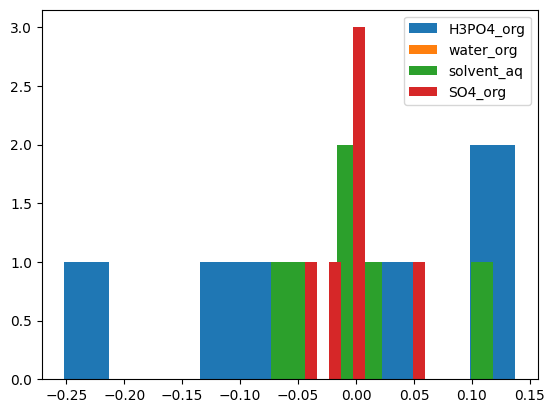

In [44]:
pred=predics2_01
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T2[:,0])/T2[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T2[:,1])/T2[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T2[:,2])/T2[:,2]*100
predics1_y4=pred[:,3]
error1_y4=(predics1_y4-T2[:,3])/T2[:,3]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.hist(error1_y4)

plt.legend(['H3PO4_org','water_org','solvent_aq','SO4_org'])
plt.show()

In [45]:
fig = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T2[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T2[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T2[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig.add_trace(go.Scatter(x=T2[:,3] , y=predics1_y4, mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig.add_trace(go.Scatter(x=T2[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,3] , y=error1_y3, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()

In [46]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

#### mesh

In [47]:
x_mesh, y_mesh = np.linspace(0, 50, 51), np.linspace(0, 0.15, 51)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh2 = x_mesh.flatten().reshape(51*51,1)
y_mesh2 = y_mesh.flatten().reshape(51*51,1)
mesh2_2=np.concatenate((x_mesh2, y_mesh2), axis=1)
# x_mesh[:5]

In [48]:
mesh_predics2_01=scaler_T2.inverse_transform(  bp2_01.run( scaler_X2.transform(mesh2_2) )  )

In [49]:
mesh_predics2_01

array([[-16.99129752,  12.4040406 ,   1.5227953 ,   0.09780696],
       [-16.4765317 ,  12.3188369 ,   1.52727516,   0.09718717],
       [-15.96176588,  12.23363321,   1.53175502,   0.09656737],
       ...,
       [  8.36672522,   8.54095758,   2.1772869 ,   0.0358565 ],
       [  9.15272068,   8.49071143,   2.12028386,   0.03400705],
       [  9.93871615,   8.44046529,   2.06328082,   0.03215759]])

In [50]:
fig_equil2_2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2_2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,1], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,2], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2_2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_01[:,3], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2_2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2_2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2_2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2_2.show()

### 4 together - 5 hidden

#### parameter searching

In [51]:
bp_iter=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:447: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

<ipython-input-51-8a49181a082d>:16: RuntimeWarning:

invalid value encountered in double_scalars



72 73 74 75 

76 77 78 79 80 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul



81 82 83 84 85 86 87 88 89 

In [52]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
52          0.010           0.95                  0.0    0.004652   
40          0.010           0.90                  0.0    0.005279   
22          0.005           0.95                  0.0    0.005312   
81          0.050           0.95                  0.0    0.006052   
44          0.010           0.90                  0.0    0.008517   
..            ...            ...                  ...         ...   
5           0.005           0.80                  0.5    1.698212   
17          0.005           0.90                  0.5    1.702841   
6           0.005           0.80                  0.5    1.754819   
7           0.005           0.80                  0.5    2.813587   
9           0.005           0.80                  0.5    2.849799   

    relative_delta  
52       -0.232978  
40        0.165726  
22       -0.204985  
81      -61.972087  
44        1.226253  
..             ...  
5        -0.018341  
17       -0.011381  
6        -0.020397  
7        -0.018580  
9        -0.014836  

[90 rows x 5 columns]

In [53]:
# weights_list[64]

In [54]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [55]:
bp_iter=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 10
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2, epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [56]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

#### best_weights_for_now

In [57]:
best_weights_for_now4=weights_lists2[0] # 5 hidden
best_weights_for_now4

[[[-3.0771441714052665,
   -0.04510849681849166,
   2.05480580078703,
   0.7511719006711213,
   -0.06426923223598209],
  [-2.4006651834668284,
   -0.041551692490408756,
   -1.0669125174452272,
   1.3314660979874522,
   -0.2270009756670872]],
 [[1.0797262879464784,
   -0.10307208200578885,
   -0.5538768751819498,
   -4.221878793145141,
   -0.1864589282216159]],
 [[0.15408521786516427,
   -0.2525407345597037,
   -0.7541045151971771,
   2.0211476067933574],
  [-0.0867759165692756,
   0.07714344202048952,
   0.16465839558770518,
   -0.0755911622831313],
  [1.0542365377041822,
   -1.0980188161809383,
   -1.5202817320048583,
   1.2131449922942423],
  [0.8424912764343041,
   2.058795820442577,
   -1.7111293660371196,
   -0.15904508725160282],
  [0.022596918753866796,
   -0.24691762443333162,
   -0.10304628669414143,
   0.10608782350713457]],
 [[-1.289515634302786,
   1.4559196637574026,
   2.4381320962198902,
   -3.5015086152173422]]]

In [58]:
manual_best_weights_for_now4=[[[-0.49713918706342886,
   0.1950284001898634,
   0.3000286638538871,
   2.942836725200948,
   -1.777182367796712],
  [2.1234531580838945,
   -0.5308939551421104,
   1.5451518611127595,
   -0.43183539769698653,
   -1.353510483105784]],
 [[-5.943166311786588,
   0.5436660955058797,
   -1.505456576119919,
   -2.9099233142370085,
   0.63874921575053]],
 [[0.6631567120354075,
   1.7152225538132848,
   -1.926593325437448,
   0.2593021750619779],
  [0.1590583031187942,
   -0.3475279357013146,
   -0.8488900298997195,
   -0.9144956943161578],
  [-0.7480193778822165,
   1.0922520235074942,
   0.6924882000692089,
   -1.9518238819373117],
  [1.4121712190765998,
   1.8210598982444497,
   -2.656747328453359,
   0.026146767983708605],
  [-1.091064184783977,
   1.3878567618032225,
   0.2004093181868182,
   0.9479273709076199]],
 [[0.5932312645572166,
   -0.9965956124325036,
   0.5675174709474265,
   0.34346613214124766]]]

 # 5 relu
 # epochs=1500, learning_rate = 0.05, momentum_term = 0.9, learning_rate_decay = 0
 # loss = .0004

#### fitting best parameters

In [59]:
bp2_02=VectorBackProp(layers=[2,5,4], hidden_activation = 'prelu')

In [60]:
# bp2_02.import_weights(best_weights_for_now4)
bp2_02.import_weights(manual_best_weights_for_now4)
bp2_02.fit(X_sc2, T_sc2, epochs=5000, learning_rate = 0.1, momentum_term = 0.9, learning_rate_decay = 1, repeat=True)

In [61]:
fig2_3=go.Figure()
fig2_3.add_trace(go.Scatter(y=bp2_02.loss_list[20:], name=''))
print('Initial loss =', bp2_02.loss_list[0])
print('Final loss =', bp2_02.loss_list[-1])
# fig2_3.show()

Initial loss = 0.003938660937267711
Final loss = 0.0029222844626381043


#### prediction

In [62]:
predics2_02=scaler_T2.inverse_transform(bp2_02.run(X_sc2))
predics2_02

array([[ 0.07186016,  9.60019325,  2.50007771,  0.06260343],
       [ 0.35986341,  9.49952372,  2.19986901,  0.08517122],
       [ 1.67506092,  9.3016696 ,  1.90064512,  0.07880041],
       [ 8.34483912,  8.49066676,  1.59487439,  0.06586401],
       [10.64537953,  8.5148219 ,  1.30864071,  0.06394605],
       [12.22430494,  8.69324198,  0.99602245,  0.0637174 ]])

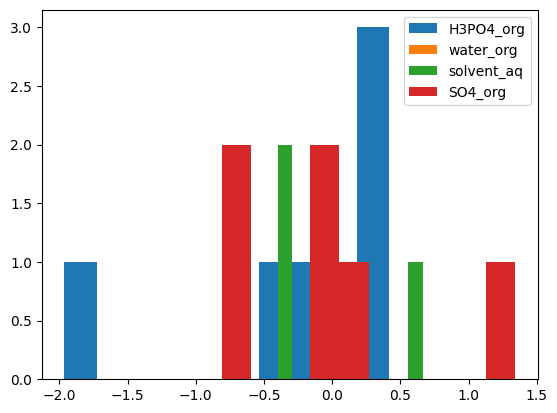

In [63]:
pred=predics2_02
predics1_y1=pred[:,0]
error1_y1=(predics1_y1-T2[:,0])/T2[:,0]*100
predics1_y2=pred[:,1]
error1_y2=(predics1_y2-T2[:,1])/T2[:,1]*100
predics1_y3=pred[:,2]
error1_y3=(predics1_y3-T2[:,2])/T2[:,2]*100
predics1_y4=pred[:,3]
error1_y4=(predics1_y4-T2[:,3])/T2[:,3]*100

plt.hist(error1_y1)
plt.hist(error1_y2)
plt.hist(error1_y3)
plt.hist(error1_y4)

plt.legend(['H3PO4_org','water_org','solvent_aq','SO4_org'])
plt.show()

In [64]:
fig = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig.add_trace(go.Scatter(x=T2[:,0] , y=predics1_y1, mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig.add_trace(go.Scatter(x=T2[:,1] , y=predics1_y2, mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig.add_trace(go.Scatter(x=T2[:,2] , y=predics1_y3, mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig.add_trace(go.Scatter(x=T2[:,3] , y=predics1_y4, mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig.add_trace(go.Scatter(x=T2[:,0] , y=error1_y1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,1] , y=error1_y2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,2] , y=error1_y3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig.add_trace(go.Scatter(x=T2[:,3] , y=error1_y3, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig.show()

In [65]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

#### mesh

In [66]:
x_mesh, y_mesh = np.linspace(0, 50, 51), np.linspace(0, 0.15, 51)
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh2 = x_mesh.flatten().reshape(51*51,1)
y_mesh2 = y_mesh.flatten().reshape(51*51,1)
mesh2_2=np.concatenate((x_mesh2, y_mesh2), axis=1)
# x_mesh[:5]

In [67]:
mesh_predics2_02=scaler_T2.inverse_transform(  bp2_02.run( scaler_X2.transform(mesh2_2) )  )

In [68]:
mesh_predics2_02

array([[-18.95883889,  11.72136432,   2.28440549,   0.10983304],
       [-18.39270372,  11.65418405,   2.26889551,   0.10890196],
       [-17.82656856,  11.58700377,   2.25338553,   0.10797088],
       ...,
       [  1.63832442,   9.48115456,   2.70013189,   0.04129478],
       [  1.57660418,   9.48978007,   2.70595791,   0.0410031 ],
       [  1.51488393,   9.49840557,   2.71178393,   0.04071141]])

In [69]:
fig_equil2_3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2_3.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,1], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,2], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2_3.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_02[:,3], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2_3.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2_3.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[.05,.1],
    )

fig_equil2_3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))

fig_equil2_3.show()

### H3PO4_org

In [70]:
X2=np.array(data2)[:,[0,1]]
T2_1=np.array(data2)[:,[2]]

In [71]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_1 = preprocessing.StandardScaler().fit(T2_1)

scaler_data2_1 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_1.mean_, scaler_T2_1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_1[0], scaler_data2_1[1])
print('scaler T -- mean, stdev:  ',scaler_data2_1[2], scaler_data2_1[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_1 = scaler_T2_1.transform(T2_1)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667] [5.00466684]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

In [72]:
bp2_1=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [73]:
bp2_1.fit(X_sc2, T_sc2_1, epochs=1000, learning_rate = 0.01, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_1.loss_list[0])
print('Final loss =', bp2_1.loss_list[-1])

Initial loss = 1.0012603151446702
Final loss = 0.00033742067581724587


In [74]:
bp2_1.export_weights()

[[[0.5000618275021588, 1.5767665452439965],
  [-1.3886363591039377, -0.40044508513096866]],
 [[0.0032881895598072452, -1.3456653811413193]],
 [[0.9444819374897115], [1.477306801594235]],
 [[-1.0585521429219957]]]

In [75]:
weights2_1=bp2_1.export_weights()

In [76]:
manual_weights2_1=[[[1.7891568738335732, -1.1785291564925502],
  [-0.504929133439221, -0.4385439629245994]],
 [[-1.2274800854986472, 1.060820499155897]],
 [[1.5766657992281017], [-0.4638647113832393]],
 [[-0.12921146069478243]]]

# 2 hidden prelu
# Final loss = 0.00023878868378339208

manual_weights2_12=[[[0.1735491429461148, 1.8140938189194906],
  [-0.6530409129171293, -0.6441814583921941]],
 [[0.7411897128053353, -1.2033881701371891]],
 [[0.3516552639162472], [1.6547118904069311]],
 [[-1.0860308848681413]]]

# 2 hidden prelu
# Final loss = 0.00014

In [77]:
# bp2_1.import_weights(weights2_1)
# bp2_1.import_weights(manual_weights2_1)
bp2_1.import_weights(manual_weights2_12)
predics2_1=scaler_T2_1.inverse_transform(bp2_1.run(X_sc2))

In [78]:
# predics2_1, T2_1

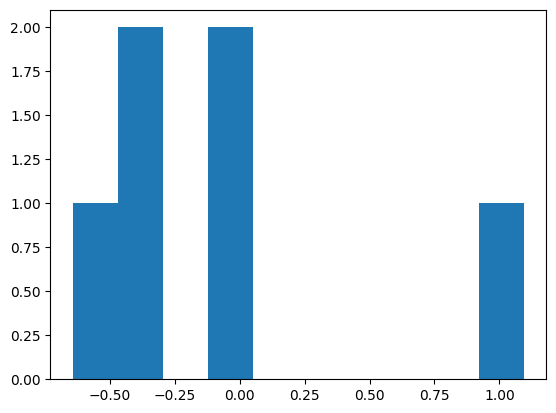

In [79]:
error2_1=(predics2_1[:,0]-T2_1[:,0])/T2_1[:,0]*100
plt.hist(error2_1)
plt.show()

In [80]:
mesh_predics2_1=scaler_T2_1.inverse_transform(  bp2_1.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_1

### water_org

In [81]:
X2=np.array(data2)[:,[0,1]]
T2_2=np.array(data2)[:,[3]]

In [82]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_2 = preprocessing.StandardScaler().fit(T2_2)

scaler_data2_2 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_2.mean_, scaler_T2_2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_2[0], scaler_data2_2[1])
print('scaler T -- mean, stdev:  ',scaler_data2_2[2], scaler_data2_2[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_2 = scaler_T2_2.transform(T2_2)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [9.01666667] [0.46338129]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

#### parameter searching

In [83]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_2, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [84]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
71          0.050           0.90                  0.0    0.004062   
22          0.005           0.95                  0.0    0.006963   
30          0.010           0.80                  0.0    0.018697   
33          0.010           0.80                  0.0    0.021059   
60          0.050           0.80                  0.0    0.025940   
..            ...            ...                  ...         ...   
37          0.010           0.80                  0.5    0.945042   
18          0.005           0.90                  0.5    0.999888   
51          0.010           0.95                  0.0    0.999977   
14          0.005           0.90                  0.0    0.999982   
13          0.005           0.90                  0.0    0.999994   

    relative_delta  
71       -0.000378  
22       -0.148641  
30        0.047666  
33       -0.158850  
60       -0.401904  
..             ...  
37       -0.004461  
18       -0.000009  
51       -0.000008  
14       -0.000007  
13       -0.000005  

[90 rows x 5 columns]

In [85]:
weights_list[60]

[[[0.5898599805983296, -1.5093910107617947],
  [-0.10910900687108328, -0.6957218293551722]],
 [[0.062074815831239194, 0.6999471749032753]],
 [[0.022135822074729826], [1.247783299180521]],
 [[-0.9745302567066161]]]

In [86]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [87]:
bp2_2=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [88]:
bp2_2.fit(X_sc2, T_sc2_2, epochs=1000, learning_rate = 0.005, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_2.loss_list[0])
print('Final loss =', bp2_2.loss_list[-1])

Initial loss = 1.0047414840106825
Final loss = 0.0512505729392663


In [89]:
bp2_2.export_weights()

[[[0.3129684641724246, 0.9388418571948023],
  [-0.1786389194426428, -0.5425154807685008]],
 [[0.14074894633937612, 0.5532938309262876]],
 [[-0.3181131982567011], [-1.0516961098840207]],
 [[1.1492697062285635]]]

In [90]:
manual_weights2_2=[[[-2.3688210444515527, 2.098731394118159],
  [-1.1028505358197696, -4.289031245616676]],
 [[1.0951314669487642, -8.766706105459567]],
 [[0.7892953147766246], [-1.3482461942845092]],
 [[-0.9630528809172003]]]

# 2 hidden prelu
# Final loss = 0.026

manual_weights2_22=[[[-1.356083366626272, 2.1006456906712234],
  [-0.6309805208401018, -0.5374527149916659]],
 [[1.0515374304634164, -2.3182953246087115]],
 [[1.4841383017903245], [3.153523627853289]],
 [[-1.7074908699001965]]]

# 2 hidden prelu
# Final loss = 0.007

In [91]:
bp2_2.import_weights(manual_weights2_22)
predics2_2=scaler_T2_2.inverse_transform(bp2_2.run(X_sc2))

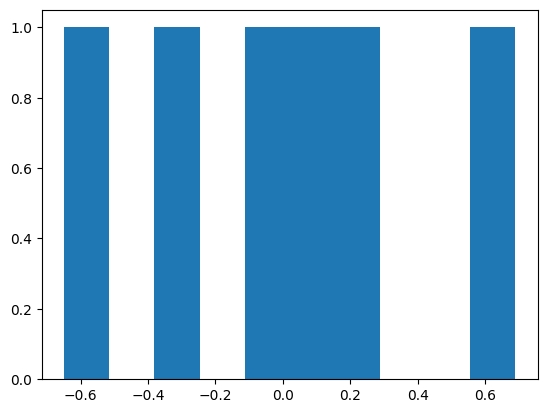

In [92]:
error2_2=(predics2_2[:,0]-T2_2[:,0])/T2_2[:,0]*100
plt.hist(error2_2)
plt.show()

In [93]:
mesh_predics2_2=scaler_T2_2.inverse_transform(  bp2_2.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_2

### solvent_aq

In [94]:
X2=np.array(data2)[:,[0,1]]
T2_3=np.array(data2)[:,[4]]

In [95]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_3 = preprocessing.StandardScaler().fit(T2_3)

scaler_data2_3 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_3.mean_, scaler_T2_3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_3[0], scaler_data2_3[1])
print('scaler T -- mean, stdev:  ',scaler_data2_3[2], scaler_data2_3[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_3 = scaler_T2_3.transform(T2_3)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [1.75] [0.51234754]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

#### parameter searching

In [96]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.8, 0.9, 0.95]
learning_rate_decay = [0, 0.5]
repeats = range(5)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_3, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 90
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 

In [97]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
72          0.050           0.90                  0.0    0.000002   
64          0.050           0.80                  0.0    0.000002   
53          0.010           0.95                  0.0    0.000003   
84          0.050           0.95                  0.0    0.001601   
50          0.010           0.95                  0.0    0.003829   
..            ...            ...                  ...         ...   
7           0.005           0.80                  0.5    0.992968   
15          0.005           0.90                  0.5    1.000002   
16          0.005           0.90                  0.5    1.000013   
55          0.010           0.95                  0.5    1.000058   
39          0.010           0.80                  0.5    1.000077   

    relative_delta  
72   -1.975253e-08  
64   -2.539303e-01  
53   -5.240831e-01  
84   -1.125046e-01  
50   -1.129454e-02  
..             ...  
7    -4.109612e-04  
15   -1.220072e-07  
16   -2.058688e-06  
55   -4.099591e-08  
39   -1.661672e-08  

[90 rows x 5 columns]

In [98]:
weights_list[70]

[[[-0.07067018536346727, -1.8798545198967354],
  [-0.09806436621164609, -0.3630833163135411]],
 [[-0.21977197488794095, 1.7162134918355236]],
 [[-0.12003983658523693], [0.6254152808921164]],
 [[-1.0733725244591057]]]

In [99]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [100]:
bp2_3=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [101]:
bp2_3.fit(X_sc2, T_sc2_3, epochs=1000, learning_rate = 0.005, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp2_3.loss_list[0])
print('Final loss =', bp2_3.loss_list[-1])

Initial loss = 1.0167380349866337
Final loss = 0.07703555421129422


In [102]:
bp2_3.export_weights()

[[[0.005463041923145232, -1.2905500130279532],
  [0.017678496197285336, -0.2492491481897274]],
 [[-0.09400442945309281, 1.3012233123428054]],
 [[-0.12042225793789685], [0.9109918946326845]],
 [[-1.185415210881674]]]

In [103]:
manual_weights2_3=[[[-1.0434539247186463, -0.840891516715229],
  [-0.22875054162539293, -0.12682741253900376]],
 [[1.1115656735349122, 0.7810694575866067]],
 [[0.6969716415327804], [0.5332714811363267]],
 [[-1.191251818678171]]]

# 2 hidden prelu
# Final loss = 0.077

manual_weights2_32=[[[2.0994823528593702, -1.2293957752203057],
  [-0.6972915446623457, 0.5216771334283966]],
 [[-2.3459563115354527, 1.775004898861346]],
 [[-3.1726827033207408], [0.4025651395234753]],
 [[-0.4638947231253712]]]

# 2 hidden prelu
# Final loss = 0

In [104]:
bp2_3.import_weights(manual_weights2_32)
predics2_3=scaler_T2_3.inverse_transform(bp2_3.run(X_sc2))

In [105]:
predics2_3[:,0]

array([2.49957267, 2.2011776 , 1.89891732, 1.60033243, 1.29999965,
       1.00000033])

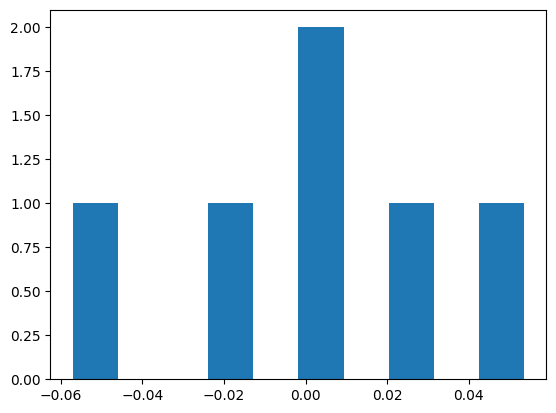

In [106]:
error2_3=(predics2_3[:,0]-T2_3[:,0])/T2_3[:,0]*100
plt.hist(error2_3)
plt.show()

In [107]:
mesh_predics2_3=scaler_T2_3.inverse_transform(  bp2_3.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_3

### SO4_org

In [108]:
X2=np.array(data2)[:,[0,1]]
T2_4=np.array(data2)[:,[5]]

In [109]:
scaler_X2 = preprocessing.StandardScaler().fit(X2)
scaler_T2_4 = preprocessing.StandardScaler().fit(T2_4)

scaler_data2_4 = [scaler_X2.mean_, scaler_X2.scale_, scaler_T2_4.mean_, scaler_T2_4.scale_]
print('scaler X -- mean, stdev:  ',scaler_data2_4[0], scaler_data2_4[1])
print('scaler T -- mean, stdev:  ',scaler_data2_4[2], scaler_data2_4[3])

X_sc2 = scaler_X2.transform(X2)
T_sc2_4 = scaler_T2_4.transform(T2_4)
X_sc2[0:3]

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [0.07001667] [0.00872609]


array([[-1.58367154,  1.93470675],
       [-0.96851457,  0.64425443],
       [-0.18454709, -0.28277231]])

#### parameter searching

In [110]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
learning_rate = [0.005, 0.01, 0.05]
momentum_term = [0.9, 0.95, 0.98]
learning_rate_decay = [0, 0.5]
repeats = range(10)
rows=len(learning_rate) * len(momentum_term) * len(learning_rate_decay) * len(repeats)
print ('total runs:', rows)
output = np.zeros((rows,5))
i=0
weights_list = []
for lr in learning_rate:
    for mt in momentum_term:
        for lrd in learning_rate_decay:
            for rep in repeats:
                bp_iter.fit(X_sc2, T_sc2_4, epochs=1000, learning_rate = lr, momentum_term = mt, learning_rate_decay = lrd, repeat=False)
                relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
                output[i] = [lr, mt, lrd, bp_iter.loss_list[-1], relative_delta[-1]]
                weights_list.append(bp_iter.export_weights())
                print (i, end=' ')
                if i%25==0 and i>0:
                    print ('\n')
                i+=1


total runs: 180
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 

76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 

126 127 128 129 130 131 132 133 134 135 136 137 138 139 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:418: RuntimeWarning:

overflow encountered in square

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:433: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:447: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:454: RuntimeWarning:

invalid value encountered in matmul

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

<ipython-input-110-6c9d1525e5ca>:16: RuntimeWarning:

invalid value encountered in double_scalars



140 141 142 143 144 145 

/usr/local/lib/python3.10/dist-packages/MLNN/MLNN.py:402: RuntimeWarning:

overflow encountered in matmul



146 147 148 149 150 

151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 

176 177 178 179 

In [111]:
output_table = pd.DataFrame(data=output, columns=['learning_rate', 'momentum_term', 'learning_rate_decay', 'final_loss', 'relative_delta'])
output_table.fillna(value = 1.1, inplace = True)
output_table.sort_values(by=['final_loss'])

learning_rate  momentum_term  learning_rate_decay  final_loss  \
179          0.050           0.98                  0.5    0.003257   
9            0.005           0.90                  0.0    0.004015   
4            0.005           0.90                  0.0    0.004015   
144          0.050           0.95                  0.0    0.004016   
175          0.050           0.98                  0.5    0.004024   
..             ...            ...                  ...         ...   
166          0.050           0.98                  0.0    1.100000   
168          0.050           0.98                  0.0    1.100000   
161          0.050           0.98                  0.0    1.100000   
140          0.050           0.95                  0.0    1.100000   
145          0.050           0.95                  0.0    1.100000   

     relative_delta  
179       -0.013116  
9         -0.000002  
4         -0.000002  
144        0.000759  
175       -0.000716  
..              ...  
166        1.100000  
168        1.100000  
161        1.100000  
140        1.100000  
145        1.100000  

[180 rows x 5 columns]

In [112]:
weights_list[108]

[[[-4.02190508832209, -0.34101500249976124],
  [-3.1249213056361445, 0.19910398532985657]],
 [[-1.0492555317950387, -1.6245784043343954]],
 [[2.9025075976333965], [0.9172321429123151]],
 [[-0.676570125760274]]]

In [113]:
weights2_4=weights_list[108]

In [114]:
fig = go.Figure(data=
    go.Parcoords(

        dimensions = list([
            dict(
                label = 'learning_rate', values = output_table['learning_rate']),
            dict(
                label = 'momentum_term', values = output_table['momentum_term']),
            dict(range = [0, 1],
                label = 'learning_rate_decay', values = output_table['learning_rate_decay']),
            dict(range = [0, 0.2],
                label = 'final_loss', values = output_table['final_loss']),
            dict(
                label = 'relative_delta', values = output_table['relative_delta']),
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

#### running best parameters

In [115]:
bp_iter=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')
weights_lists2=[]
loss_lists2=[]
relative_delta_lists2=[]
n = 30
for i in range(n):
    bp_iter.fit(X_sc2, T_sc2_4, epochs=3000, learning_rate = 0.05, momentum_term = 0.98, learning_rate_decay = 0.3, repeat=False)
    relative_delta=[(a-b)/a*100 for a,b in zip(bp_iter.loss_list,[0]+bp_iter.loss_list[:-1])]
    weights_lists2.append(bp_iter.export_weights())
    loss_lists2.append(bp_iter.loss_list)
    relative_delta_lists2.append(relative_delta)

In [116]:
fig2=go.Figure()
[fig2.add_trace(go.Scatter(y=loss_lists2[i][100:], name=i)) for i in range(n)]
fig2.update_layout (yaxis_range=[0,0.05], title='Loss')
fig2.show()

In [117]:
best_weights_for_now2_4=weights_lists2[13]
best_weights_for_now2_4

[[[-0.013501806738422368, -2.199105450992265],
  [-0.04464534821258415, -2.0006628058166362]],
 [[-0.026182053803589102, 0.429426097593488]],
 [[0.00810748817893701], [1.559347497183018]],
 [[-0.73514555191779]]]

In [118]:
bp2_4=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

In [119]:
# bp2_4.export_weights()

In [120]:
manual_weights2_4=[[[-0.16700158966413353, 1.1770332498659186],
  [1.4526084685823955, -0.9137197260973858]],
 [[-0.7468444598517179, 1.2452474051184519]],
 [[-1.3107172968906877], [-0.9375882900282885]],
 [[2.199196282499367]]]

# 2 hidden prelu
# Final loss = 0.1

manual_weights2_42=[[[-0.03998713454920765, -1.296313464466576],
  [1.3133609043926477, -0.5524389024009899]],
 [[-0.8849418689452931, 0.7889879563287986]],
 [[-1.576332174028801], [1.4492604070808766]],
 [[-0.7102506948766614]]]

# 2 hidden prelu
# Final loss = 0.002

manual_weights2_43=[[[-2.7308241499437758, 1.8373933992350313],
  [-2.021898044039464, -0.8845457922101067]],
 [[1.0694417308325381, 0.08920200363835196]],
 [[2.7835653102552724], [1.6175935763910405]],
 [[-4.969235753353272]]]
# 2 hidden prelu
# Final loss = 0.0008

In [121]:
bp2_4.import_weights(manual_weights2_43)
# bp2_4.import_weights(best_weights_for_now2_4)
# bp2_4.import_weights(weights2_4)
predics2_4=scaler_T2_4.inverse_transform(bp2_4.run(X_sc2))

In [122]:
error2_4=(predics2_4[:,0]-T2_4[:,0])/T2_4[:,0]*100
plt.hist(error2_4)
plt.show()

In [123]:
mesh_predics2_4=scaler_T2_4.inverse_transform(  bp2_4.run( scaler_X2.transform(mesh2_2) )  )
# mesh_predics2_4

## Vizualization

In [124]:
fig_equil2_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil2_err.add_trace(go.Scatter(x=T2[:,0] , y=predics2_1[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,1] , y=predics2_2[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,2] , y=predics2_3[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,3] , y=predics2_4[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil2_err.add_trace(go.Scatter(x=T2[:,0] , y=error2_1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,1] , y=error2_2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,2] , y=error2_3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil2_err.add_trace(go.Scatter(x=T2[:,3] , y=error2_4, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil2_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil2_err.show()

In [125]:
fig_equil2 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil2.add_trace(go.Scatter3d(x=data2.H3PO4_aq, y=data2.SO4_aq, z=data2.SO4_org, mode='markers', name='SO4_org'), 2, 2)

fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_1[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,1)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_2[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),1,2)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_3[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,1)
fig_equil2.add_trace(go.Scatter3d(x=x_mesh2[:,0], y=y_mesh2[:,0], z=mesh_predics2_4[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible='legendonly'),2,2)

fig_equil2.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil2.update_layout(
    scene1_zaxis_range=[0,15],
    scene2_zaxis_range=[8,10],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

fig_equil2.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))

fig_equil2.show()

In [126]:
data2

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org
0      4.15  0.1470     0.0733        9.6         2.5   0.0626
1     14.90  0.0806     0.3590        9.5         2.2   0.0852
2     28.60  0.0329     1.6800        9.3         1.9   0.0787
3     45.70  0.0106     8.3100        8.5         1.6   0.0664
4     48.20  0.0078    10.7000        8.5         1.3   0.0631
5     49.40  0.0058    12.2000        8.7         1.0   0.0641

## output

In [127]:
print('scaler X -- mean, stdev:  ',scaler_data2[0], scaler_data2[1])
print('scaler T -- mean, stdev:  ',scaler_data2[2], scaler_data2[3])

scaler X -- mean, stdev:   [31.825    0.04745] [17.47521459  0.05145483]
scaler T -- mean, stdev:   [5.55371667 9.01666667 1.75       0.07001667] [5.00466684 0.46338129 0.51234754 0.00872609]


In [128]:
# H3PO4_org
bp2_1.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.1735491429461148, 1.8140938189194906], [-0.6530409129171293, -0.6441814583921941]]
Hidden layer biases:  [[0.7411897128053353, -1.2033881701371891]]
Outlet layer weights:  [[0.3516552639162472], [1.6547118904069311]]
Outlet layer biases:  [[-1.0860308848681413]]


In [129]:
bp2_1.export_weights()

[[[0.1735491429461148, 1.8140938189194906],
  [-0.6530409129171293, -0.6441814583921941]],
 [[0.7411897128053353, -1.2033881701371891]],
 [[0.3516552639162472], [1.6547118904069311]],
 [[-1.0860308848681413]]]

In [130]:
print('scaler T -- mean, stdev:  ',scaler_data2_1[2], scaler_data2_1[3])

scaler T -- mean, stdev:   [5.55371667] [5.00466684]


In [131]:
# water_org
bp2_2.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-1.356083366626272, 2.1006456906712234], [-0.6309805208401018, -0.5374527149916659]]
Hidden layer biases:  [[1.0515374304634164, -2.3182953246087115]]
Outlet layer weights:  [[1.4841383017903245], [3.153523627853289]]
Outlet layer biases:  [[-1.7074908699001965]]


In [132]:
bp2_2.export_weights()

[[[-1.356083366626272, 2.1006456906712234],
  [-0.6309805208401018, -0.5374527149916659]],
 [[1.0515374304634164, -2.3182953246087115]],
 [[1.4841383017903245], [3.153523627853289]],
 [[-1.7074908699001965]]]

In [133]:
# solvent_aq
bp2_3.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[2.0994823528593702, -1.2293957752203057], [-0.6972915446623457, 0.5216771334283966]]
Hidden layer biases:  [[-2.3459563115354527, 1.775004898861346]]
Outlet layer weights:  [[-3.1726827033207408], [0.4025651395234753]]
Outlet layer biases:  [[-0.4638947231253712]]


In [134]:
bp2_3.export_weights()

[[[2.0994823528593702, -1.2293957752203057],
  [-0.6972915446623457, 0.5216771334283966]],
 [[-2.3459563115354527, 1.775004898861346]],
 [[-3.1726827033207408], [0.4025651395234753]],
 [[-0.4638947231253712]]]

In [135]:
# SO4_org
bp2_4.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-2.7308241499437758, 1.8373933992350313], [-2.021898044039464, -0.8845457922101067]]
Hidden layer biases:  [[1.0694417308325381, 0.08920200363835196]]
Outlet layer weights:  [[2.7835653102552724], [1.6175935763910405]]
Outlet layer biases:  [[-4.969235753353272]]


In [136]:
bp2_4.export_weights()

[[[-2.7308241499437758, 1.8373933992350313],
  [-2.021898044039464, -0.8845457922101067]],
 [[1.0694417308325381, 0.08920200363835196]],
 [[2.7835653102552724], [1.6175935763910405]],
 [[-4.969235753353272]]]

# EQUIL_rotem_washing3
ניסויי הפרדה עם ממס מטוהר

In [193]:
data=CopyPasteToArray('''
H3PO4_aq	SO4_aq	H3PO4_org	water_org	solvent_aq	SO4_org	water_org-original
0.011	0.0932	0.072	8.69	1.70	0.0186	12.09
10.325	0.0017	0.229	10.66	1.52	0.02	10.66
10.380	0.0990	0.269	8.31	1.50	0.0208	10.41
19.821	0.0031	0.635	11.3	1.34	0.01884	11.3
19.710	0.0928	0.773	10.36	1.32	0.0195	12.34
28.710	0.0057	1.435	11.96	1.28	0.01978	11.96
27.882	0.0858	1.325	9.7	1.34	0.0222	11.1
35.611	0.0071	2.871	11.94	1.28	0.036	11.94
35.887	0.0846	2.981	12.02	1.24	0.0374	12.6
43.065	0.0082	5.328	12.12	1.28	0.057	12.12
43.065	0.0802	5.604	10.38	1.06	0.0608	11.7
49.966	0.0074	8.723	12.28	1.28	0.0872	12.28
0.017	0.1540	0.042	11.48	1.46	0.0164	13.28
4.831	0.0020	0.146	12.7	1.78	0.01302	12.6
4.941	0.1078	0.173	12.06	1.66	0.0139	11.84
19.600	0.0033	0.828	11.84	1.38	0.01688	11.42
19.766	0.1120	0.856	12.46	1.38	0.01832	11.2
''')
# data
# data2=pd.DataFrame(data, columns=['H3PO4_aq',	'SO4_aq',	'H3PO4_org',	'water_org',	'solvent_aq',	'SO4_org'])
data3=pd.DataFrame(data[1:], columns=data[0])
data3_names=CopyPasteToArray('''
wp12	wp21	wp22	wp31	wp32	wp41	wp42	wp51	wp52	wp61	wp62	wp71	wp13	ww11	ww12	ww21	ww22
''')
data3

H3PO4_aq  SO4_aq  H3PO4_org  water_org  solvent_aq  SO4_org  \
0      0.011  0.0932      0.072       8.69        1.70  0.01860   
1     10.325  0.0017      0.229      10.66        1.52  0.02000   
2     10.380  0.0990      0.269       8.31        1.50  0.02080   
3     19.821  0.0031      0.635      11.30        1.34  0.01884   
4     19.710  0.0928      0.773      10.36        1.32  0.01950   
5     28.710  0.0057      1.435      11.96        1.28  0.01978   
6     27.882  0.0858      1.325       9.70        1.34  0.02220   
7     35.611  0.0071      2.871      11.94        1.28  0.03600   
8     35.887  0.0846      2.981      12.02        1.24  0.03740   
9     43.065  0.0082      5.328      12.12        1.28  0.05700   
10    43.065  0.0802      5.604      10.38        1.06  0.06080   
11    49.966  0.0074      8.723      12.28        1.28  0.08720   
12     0.017  0.1540      0.042      11.48        1.46  0.01640   
13     4.831  0.0020      0.146      12.70        1.78  0.01302   
14     4.941  0.1078      0.173      12.06        1.66  0.01390   
15    19.600  0.0033      0.828      11.84        1.38  0.01688   
16    19.766  0.1120      0.856      12.46        1.38  0.01832   

    water_org-original  
0                12.09  
1                10.66  
2                10.41  
3                11.30  
4                12.34  
5                11.96  
6                11.10  
7                11.94  
8                12.60  
9                12.12  
10               11.70  
11               12.28  
12               13.28  
13               12.60  
14               11.84  
15               11.42  
16               11.20

In [671]:
fig_equil3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])
plot_data=data3[:13].copy()
text_data=data3_names[0][:13]
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='H3PO4_org-purified', text=text_data), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='blue', marker_symbol='circle', mode='markers', name='water_org-purified', text=text_data), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker_color='blue', marker_symbol='circle', mode='markers', name='solvent_aq-purified', text=text_data), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker_color='blue', marker_symbol='circle', mode='markers', name='SO4_org-purified', text=text_data), 2, 2)

plot_data=data3[13:].copy()
text_data=data3_names[0][13:]
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.H3PO4_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='H3PO4_org-washed', text=text_data), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='water_org-washed', text=text_data), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.solvent_aq, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='solvent_aq-washed', text=text_data), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.SO4_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='SO4_org-washed', text=text_data), 2, 2)

fig_equil3.update_layout(title='', autosize=True,
                  width=810, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),

                  )

fig_equil3.update_layout(
    scene1_zaxis_range=[0,10],
    scene2_zaxis_range=[8,14],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

# fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=1.5, y=1.5, z=1.5))
fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-0.0001, y=-1.5, z=-0.0001))
fig_equil3.update_scenes(camera_projection_type="orthographic")
# fig_equil3.write_html("IAmOH equilibrium experim data 130823.html")

fig_equil3.show()

In [670]:
fig_equil3_water = go.Figure()
plot_data=data3[:13].copy()
text_data=data3_names[0][:13]
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker_color='blue', marker_symbol='circle', mode='markers', name='water_org-purified-retested', text=text_data))
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data['water_org-original'], marker_color='red', marker_symbol='circle', mode='markers', name='water_org-purified-original', text=text_data))

plot_data=data3[13:].copy()
text_data=data3_names[0][13:]
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data.water_org, marker={'color':'blue', 'symbol':'diamond', 'size':6}, mode='markers', name='water_org-washed-retested', text=text_data))
fig_equil3_water.add_trace(go.Scatter3d(x=plot_data.H3PO4_aq, y=plot_data.SO4_aq, z=plot_data['water_org-original'], marker={'color':'red', 'symbol':'diamond', 'size':6}, mode='markers', name='water_org-washed-original', text=text_data))

fig_equil3_water.update_layout(title='', autosize=True,
                  # width=810, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  scene=dict(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq',
                             camera_eye=dict(x=-0.0001, y=-2.5, z=-0.0001),
                            #  camera_projection_type="orthographic",
                             ),
                  )

# fig_equil3_water.write_html("IAmOH equilibrium experim data water 130823.html")

fig_equil3_water.show()

In [472]:
# x_mesh, y_mesh = np.linspace(0, 60, 31), np.linspace(0, 0.2, 31) # expanded x and y extrapolation area observation
x_mesh, y_mesh = np.linspace(-10, 70, 31), np.linspace(-0.1, 0.25, 31) # more expanded x and y extrapolation area observation
x_mesh, y_mesh = np.meshgrid(x_mesh, y_mesh)
x_mesh3 = x_mesh.flatten().reshape(31*31,1)
y_mesh3 = y_mesh.flatten().reshape(31*31,1)
mesh3=np.concatenate((x_mesh3, y_mesh3), axis=1)
# x_mesh[:5]

In [264]:
X3=np.array(data3)[:,[0,1]]
T3=np.array(data3)[:,[2,3,4,5]]

In [265]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3 = preprocessing.StandardScaler().fit(T3)

scaler_data3 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3.mean_, scaler_T3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3[0], scaler_data3[1])
print('scaler T -- mean, stdev:  ',scaler_data3[2], scaler_data3[3])

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [ 1.89941176 11.19176471  1.4         0.02921412] [2.40216868 1.27085536 0.17875386 0.01997862]


## H3PO4_org

In [198]:
X3=np.array(data3)[:,[0,1]]
T3_1=np.array(data3)[:,[2]]

In [199]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_1 = preprocessing.StandardScaler().fit(T3_1)

scaler_data3_1 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_1.mean_, scaler_T3_1.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_1[0], scaler_data3_1[1])
print('scaler T -- mean, stdev:  ',scaler_data3_1[2], scaler_data3_1[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_1 = scaler_T3_1.transform(T3_1)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [1.89941176] [2.40216868]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [241]:
bp3_1=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 0.9958889977822525
Final loss = 0.004233229140085085


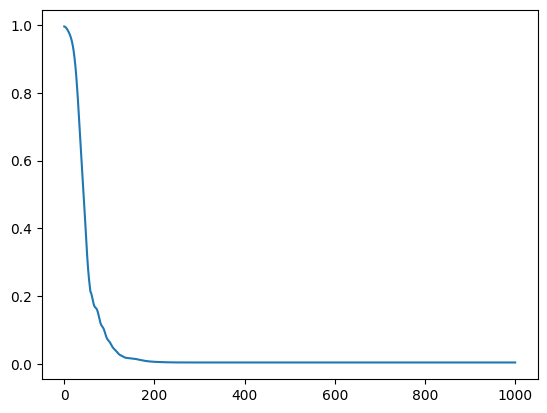

In [621]:
bp3_1.fit(X_sc3, T_sc3_1, epochs=1000, learning_rate = 0.001, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp3_1.loss_list[0])
print('Final loss =', bp3_1.loss_list[-1])
plt.plot(bp3_1.loss_list)

In [622]:
bp3_1.export_weights()

[[[-0.2328053114817587, 1.4197258515721494],
  [-0.013739923476318716, -0.009509632921841494]],
 [[1.5848282259786703, -0.9625030403646567]],
 [[-1.3007118041663503], [1.5725920350068667]],
 [[1.6673341551414473]]]

In [623]:
weights3_1=bp3_1.export_weights()

In [644]:
manual_weights3_1=[[[-0.2328053114817587, 1.4197258515721494],
  [-0.013739923476318716, -0.009509632921841494]],
 [[1.5848282259786703, -0.9625030403646567]],
 [[-1.3007118041663503], [1.5725920350068667]],
 [[1.717]]] # manual correction by 0.12 to make positive at (0,0). delta=0.12/2.4=0.05.  Original: 1.6673341551414473

# 2 hidden prelu
# Final loss = 0.042

In [645]:
# bp3_1.import_weights(weights3_1)
bp3_1.import_weights(manual_weights3_1)
predics3_1=scaler_T3_1.inverse_transform(bp3_1.run(X_sc3))

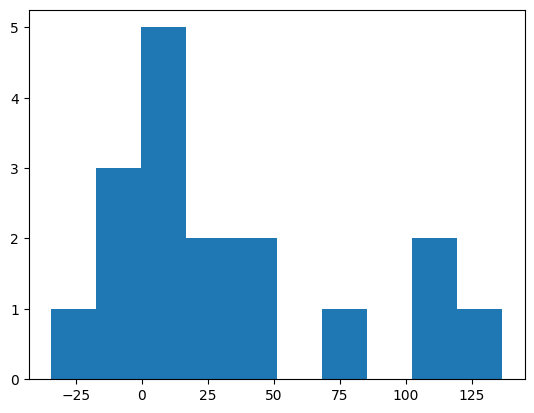

In [646]:
error3_1=(predics3_1[:,0]-T3_1[:,0])/T3_1[:,0]*100
plt.hist(error3_1)
plt.show()

In [647]:
mesh_predics3_1=scaler_T3_1.inverse_transform(  bp3_1.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_1

## water_org

In [651]:
X3_2=np.array(data3)[:12,[0,1]]
T3_2=np.array(data3)[:12,[3]]

In [653]:
# X3_2

array([[1.1000e-02, 9.3200e-02],
       [1.0325e+01, 1.7000e-03],
       [1.0380e+01, 9.9000e-02],
       [1.9821e+01, 3.1000e-03],
       [1.9710e+01, 9.2800e-02],
       [2.8710e+01, 5.7000e-03],
       [2.7882e+01, 8.5800e-02],
       [3.5611e+01, 7.1000e-03],
       [3.5887e+01, 8.4600e-02],
       [4.3065e+01, 8.2000e-03],
       [4.3065e+01, 8.0200e-02],
       [4.9966e+01, 7.4000e-03]])

In [269]:
scaler_X3_2 = preprocessing.StandardScaler().fit(X3_2)
scaler_T3_2 = preprocessing.StandardScaler().fit(T3_2)

scaler_data3_2 = [scaler_X3_2.mean_, scaler_X3_2.scale_, scaler_T3_2.mean_, scaler_T3_2.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_2[0], scaler_data3_2[1])
print('scaler T -- mean, stdev:  ',scaler_data3_2[2], scaler_data3_2[3])

X_sc3_2 = scaler_X3_2.transform(X3_2)
T_sc3_2 = scaler_T3_2.transform(T3_2)
X_sc3_2[0:3]

scaler X -- mean, stdev:   [27.03608333  0.0474    ] [14.68499343  0.04213688]
scaler T -- mean, stdev:   [10.81] [1.3091664]


array([[-1.84031974,  1.08693382],
       [-1.13797009, -1.0845606 ],
       [-1.13422477,  1.22458046]])

In [270]:
bp3_2=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.0282451722980246
Final loss = 0.16740571778596883


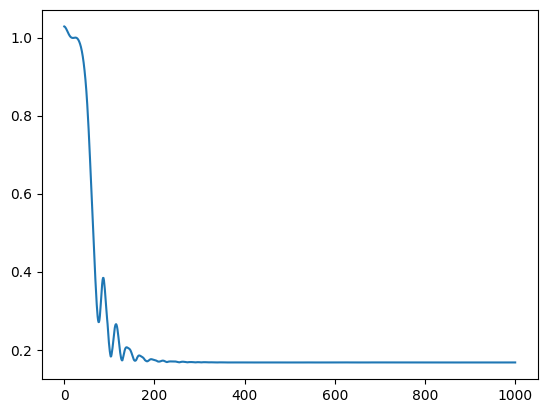

In [370]:
bp3_2.fit(X_sc3_2, T_sc3_2, epochs=1000, learning_rate = 0.001, momentum_term = 0.97, learning_rate_decay = 0)
print('Initial loss =', bp3_2.loss_list[0])
print('Final loss =', bp3_2.loss_list[-1])
plt.plot(bp3_2.loss_list)

In [371]:
bp3_2.export_weights()

[[[-1.031113274273906, 0.5556689081710752],
  [0.1269661749236064, -0.648705203267745]],
 [[-0.6503085960178402, 1.4225069815725169]],
 [[-0.6419883451928703], [0.7670169825359952]],
 [[-0.9805891037809911]]]

In [372]:
weights3_2=bp3_2.export_weights()

In [373]:
manual_weights3_2=[[[0.3909002105371126, -0.8406267181665068],
  [-0.4530958444599508, 0.704664998208326]],
 [[-0.09671769242746425, 0.7927475123043677]],
 [[0.48441213405704675], [-0.7676170242577324]],
 [[0.6435152247205708]]]

# 2 hidden prelu
# Final loss = 0.18
# Good data only

In [374]:
# bp3_2.import_weights(weights3_2)
bp3_2.import_weights(manual_weights3_2)
predics3_2=scaler_T3_2.inverse_transform(bp3_2.run(X_sc3_2))

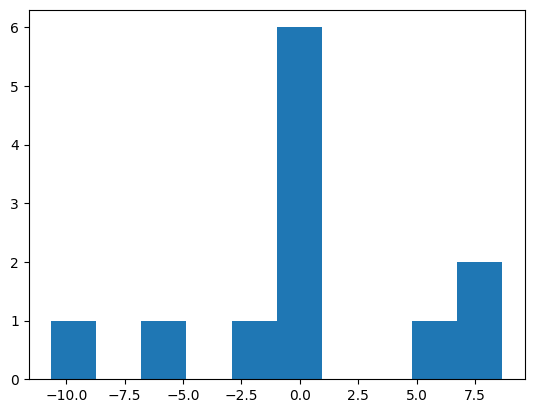

In [375]:
error3_2=(predics3_2[:,0]-T3_2[:,0])/T3_2[:,0]*100
plt.hist(error3_2)
plt.show()

In [376]:
mesh_predics3_2=scaler_T3_2.inverse_transform(  bp3_2.run( scaler_X3_2.transform(mesh3) )  )
# mesh_predics3_2

## solvent_aq

In [378]:
X3=np.array(data3)[:,[0,1]]
T3_3=np.array(data3)[:,[4]]

In [379]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_3 = preprocessing.StandardScaler().fit(T3_3)

scaler_data3_3 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_3.mean_, scaler_T3_3.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_3[0], scaler_data3_3[1])
print('scaler T -- mean, stdev:  ',scaler_data3_3[2], scaler_data3_3[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_3 = scaler_T3_3.transform(T3_3)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [1.4] [0.17875386]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [380]:
bp3_3=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 1.0082066593656478
Final loss = 0.15949912519129752


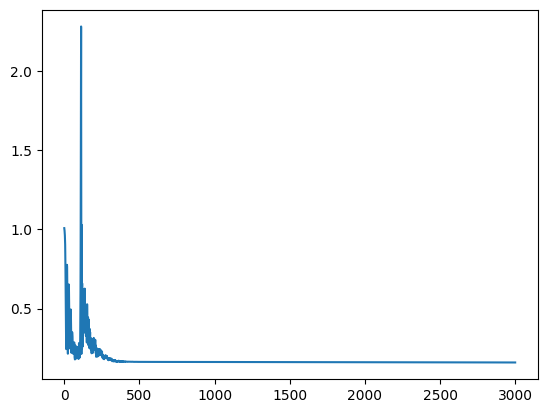

In [399]:
bp3_3.fit(X_sc3, T_sc3_3, epochs=3000, learning_rate = 0.01, momentum_term = 0.98, learning_rate_decay = 0)
print('Initial loss =', bp3_3.loss_list[0])
print('Final loss =', bp3_3.loss_list[-1])
plt.plot(bp3_3.loss_list)

In [400]:
bp3_3.export_weights()

[[[-2.7409520196388004, -3.1893313068421585],
  [-0.25606360180138327, -5.137340113180202]],
 [[1.0564265524356973, -8.920269376660519]],
 [[0.44558452125269615], [7.281401108328966]],
 [[-0.7732979874308833]]]

In [401]:
weights3_3=bp3_3.export_weights()

In [168]:
manual_weights3_3=[[[0.6217022345240342, 2.8386999598609814],
  [-0.6968938452576019, 5.596033242601742]],
 [[2.7109590937198265, 0.22193377952697202]],
 [[-0.9372090292368469], [-0.33293100862641933]],
 [[3.277263990359097]]]

# 2 hidden prelu
# Final loss = 0.093

In [407]:
# bp3_3.import_weights(weights3_3)
bp3_3.import_weights(manual_weights3_3)
predics3_3=scaler_T3_3.inverse_transform(bp3_3.run(X_sc3))

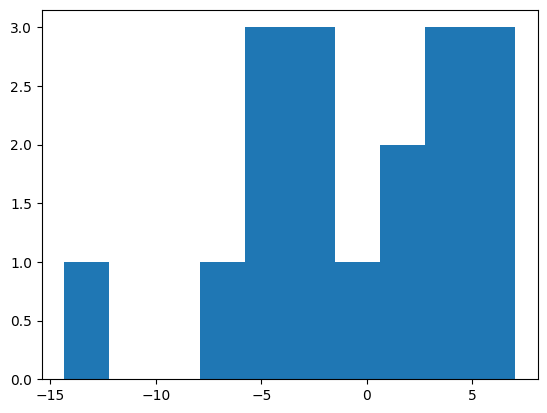

In [408]:
error3_3=(predics3_3[:,0]-T3_3[:,0])/T3_3[:,0]*100
plt.hist(error3_3)
plt.show()

In [409]:
mesh_predics3_3=scaler_T3_3.inverse_transform(  bp3_3.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_3

## SO4_org

In [412]:
X3=np.array(data3)[:,[0,1]]
T3_4=np.array(data3)[:,[5]]

In [413]:
scaler_X3 = preprocessing.StandardScaler().fit(X3)
scaler_T3_4 = preprocessing.StandardScaler().fit(T3_4)

scaler_data3_4 = [scaler_X3.mean_, scaler_X3.scale_, scaler_T3_4.mean_, scaler_T3_4.scale_]
print('scaler X -- mean, stdev:  ',scaler_data3_4[0], scaler_data3_4[1])
print('scaler T -- mean, stdev:  ',scaler_data3_4[2], scaler_data3_4[3])

X_sc3 = scaler_X3.transform(X3)
T_sc3_4 = scaler_T3_4.transform(T3_4)
X_sc3[0:3]

scaler X -- mean, stdev:   [21.97576471  0.05575882] [15.2853469   0.05047379]
scaler T -- mean, stdev:   [0.02921412] [0.01997862]


array([[-1.43698176,  0.74179442],
       [-0.76221788, -1.0710276 ],
       [-0.75861966,  0.85670554]])

In [414]:
bp3_4=VectorBackProp(layers=[2,2,1], hidden_activation = 'prelu')

Initial loss = 0.9747961618235652
Final loss = 0.010633356706793173


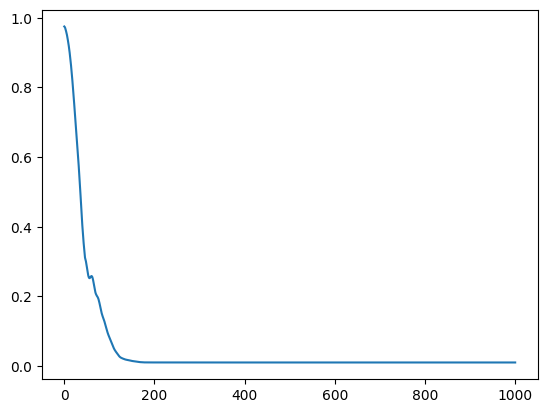

In [474]:
bp3_4.fit(X_sc3, T_sc3_4, epochs=1000, learning_rate = 0.001, momentum_term = 0.95, learning_rate_decay = 0)
print('Initial loss =', bp3_4.loss_list[0])
print('Final loss =', bp3_4.loss_list[-1])
plt.plot(bp3_4.loss_list)

In [475]:
bp3_4.export_weights()

[[[-0.10168260750729177, 1.5507975795954547],
  [-0.02429351337425621, -5.794943503077378e-05]],
 [[1.5556257229985646, -0.978368082003519]],
 [[-1.3219817921544152], [1.6394490601340548]],
 [[1.5742747334295601]]]

In [476]:
weights3_4=bp3_4.export_weights()

In [491]:
manual_weights3_4=[[[-0.10168260750729177, 1.5507975795954547],
  [-0.02429351337425621, -5.794943503077378e-05]],
 [[1.5556257229985646, -0.978368082003519]],
 [[-1.3219817921544152], [1.6394490601340548]],
 [[1.5742747334295601]]]
# 2 hidden prelu
# Final loss = 0.011

In [492]:
# bp3_4.import_weights(weights3_4)
bp3_4.import_weights(manual_weights3_4)
predics3_4=scaler_T3_4.inverse_transform(bp3_4.run(X_sc3))

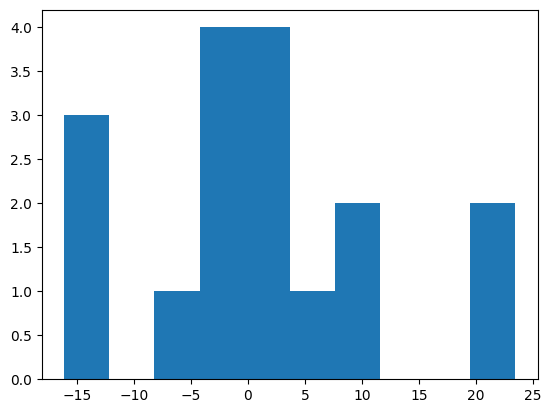

In [479]:
error3_4=(predics3_4[:,0]-T3_4[:,0])/T3_4[:,0]*100
plt.hist(error3_4)
plt.show()

In [480]:
mesh_predics3_4=scaler_T3_4.inverse_transform(  bp3_4.run( scaler_X3.transform(mesh3) )  )
# mesh_predics3_4

## Vizualization

In [648]:
fig_equil3_err = make_subplots(rows=1, cols=4, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.25, 0.25, 0.25, 0.25],
                     specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]])

fig_equil3_err.add_trace(go.Scatter(x=T3[:,0] , y=predics3_1[:,0], mode='markers', marker_size=4, name='predics H3PO4_org', marker_color='black' ), 1, 1)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,1] , y=predics3_2[:,0], mode='markers', marker_size=4, name='predics water_org', marker_color='black' ), 1, 2)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,2] , y=predics3_3[:,0], mode='markers', marker_size=4, name='predics solvent_aq', marker_color='black' ), 1, 3)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,3] , y=predics3_4[:,0], mode='markers', marker_size=4, name='predics SO4_org', marker_color='black' ), 1, 4)

fig_equil3_err.add_trace(go.Scatter(x=T3[:,0] , y=error3_1, mode='markers', marker_size=4, name='error H3PO4_org', marker_color='orange' ), 1, 1, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,1] , y=error3_2, mode='markers', marker_size=4, name='error water_org', marker_color='orange' ), 1, 2, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,2] , y=error3_3, mode='markers', marker_size=4, name='error solvent_aq', marker_color='orange' ), 1, 3, secondary_y=True,)
fig_equil3_err.add_trace(go.Scatter(x=T3[:,3] , y=error3_4, mode='markers', marker_size=4, name='error SO4_org', marker_color='orange' ), 1, 4, secondary_y=True,)

fig_equil3_err.update_layout(title='', autosize=True,
                  width=1550, height=250,
                  margin=dict(l=0, r=0, b=0, t=30))

fig_equil3_err.show()

In [669]:
fig_equil3 = make_subplots(rows=2, cols=2, subplot_titles=('H3PO4_org','water_org','solvent_aq','SO4_org'), column_widths=[0.5, 0.5], vertical_spacing=0.05,
                     specs=[[{"type": "scene"}, {"type": "scene"}],[{"type": "scene"}, {"type": "scene"}]])

fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.H3PO4_org, mode='markers', name='H3PO4_org'), 1, 1)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.water_org, mode='markers', name='water_org'), 1, 2)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.solvent_aq, mode='markers', name='solvent_aq'), 2, 1)
fig_equil3.add_trace(go.Scatter3d(x=data3.H3PO4_aq, y=data3.SO4_aq, z=data3.SO4_org, mode='markers', name='SO4_org'), 2, 2)

# visib='legendonly'
visib=True

fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_1[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,1)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_2[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),1,2)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_3[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,1)
fig_equil3.add_trace(go.Scatter3d(x=x_mesh3[:,0], y=y_mesh3[:,0], z=mesh_predics3_4[:,0], mode='markers',marker_color='green', marker_size=0.5, name='model mesh', visible=visib),2,2)

fig_equil3.update_layout(title='', autosize=True,
                  width=800, height=800,
                  margin=dict(l=0, r=0, b=0, t=30),
                  )

fig_equil3.update_layout(
    scene1_zaxis_range=[0,10],
    scene2_zaxis_range=[8,14],
    scene3_zaxis_range=[0,3],
    scene4_zaxis_range=[0,.1],
    )

# fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=-1.5, y=-1.5, z=1.5))
fig_equil3.update_scenes(xaxis_title='H3PO4_aq', yaxis_title='SO4_aq', camera_eye=dict(x=0, y=-2.2, z=0))
# fig_equil3.update_scenes(camera_projection_type="orthographic")
# fig_equil3.write_html("IAmOH equilibrium experim data with models 130823.html")

fig_equil3.show()

## output

In [672]:
# H3PO4_org
bp3_1.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-0.2328053114817587, 1.4197258515721494], [-0.013739923476318716, -0.009509632921841494]]
Hidden layer biases:  [[1.5848282259786703, -0.9625030403646567]]
Outlet layer weights:  [[-1.3007118041663503], [1.5725920350068667]]
Outlet layer biases:  [[1.717]]


In [673]:
bp3_1.export_weights()

[[[-0.2328053114817587, 1.4197258515721494],
  [-0.013739923476318716, -0.009509632921841494]],
 [[1.5848282259786703, -0.9625030403646567]],
 [[-1.3007118041663503], [1.5725920350068667]],
 [[1.717]]]

In [674]:
# water_org
bp3_2.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.3909002105371126, -0.8406267181665068], [-0.4530958444599508, 0.704664998208326]]
Hidden layer biases:  [[-0.09671769242746425, 0.7927475123043677]]
Outlet layer weights:  [[0.48441213405704675], [-0.7676170242577324]]
Outlet layer biases:  [[0.6435152247205708]]


In [675]:
bp3_2.export_weights()

[[[0.3909002105371126, -0.8406267181665068],
  [-0.4530958444599508, 0.704664998208326]],
 [[-0.09671769242746425, 0.7927475123043677]],
 [[0.48441213405704675], [-0.7676170242577324]],
 [[0.6435152247205708]]]

In [676]:
# solvent_aq
bp3_3.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[0.6217022345240342, 2.8386999598609814], [-0.6968938452576019, 5.596033242601742]]
Hidden layer biases:  [[2.7109590937198265, 0.22193377952697202]]
Outlet layer weights:  [[-0.9372090292368469], [-0.33293100862641933]]
Outlet layer biases:  [[3.277263990359097]]


In [677]:
bp3_3.export_weights()

[[[0.6217022345240342, 2.8386999598609814],
  [-0.6968938452576019, 5.596033242601742]],
 [[2.7109590937198265, 0.22193377952697202]],
 [[-0.9372090292368469], [-0.33293100862641933]],
 [[3.277263990359097]]]

In [678]:
# SO4_org
bp3_4.print_weights()

Layers (input, hidden, output):  [2, 2, 1] prelu linear
Hidden layer weights:  [[-0.10168260750729177, 1.5507975795954547], [-0.02429351337425621, -5.794943503077378e-05]]
Hidden layer biases:  [[1.5556257229985646, -0.978368082003519]]
Outlet layer weights:  [[-1.3219817921544152], [1.6394490601340548]]
Outlet layer biases:  [[1.5742747334295601]]


In [679]:
bp3_4.export_weights()

[[[-0.10168260750729177, 1.5507975795954547],
  [-0.02429351337425621, -5.794943503077378e-05]],
 [[1.5556257229985646, -0.978368082003519]],
 [[-1.3219817921544152], [1.6394490601340548]],
 [[1.5742747334295601]]]